In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import IPython.display as disp
import logging

p1 = .5
p2 = .51
min_samples = 1000 
alpha = .001
skew_url = 'https://www.cnet.com/a/img/resize/d85df57a1aa5881be3bfb4256a181aaf58d4d9ff/hub/2019/05/22/1b710a6b-5f4d-4987-a046-c23674b221a3/picard-meme-facepalm.jpg?auto=webp&fit=crop&height=675&precrop=1331,746,x109,y127&width=1200'    
no_skew_url = 'https://techcrunch.com/wp-content/uploads/2018/08/picard.png?w=1390&crop=1' 
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

In [11]:
# helper functions

def generate_sample(p, n): 
    X1 = np.random.binomial(1, p, n)    
    sample_proportion = sum(X1)/n
    logger.info("sample proportion is: %f", sample_proportion ) 
    sample_var = sample_proportion * (1 - sample_proportion)
    logger.info("sample variance is: %f", sample_var ) 
    return sample_proportion, sample_var

def generate_pooled_SE(sample_var_1, sample_var_2, n1, n2):
    pooled_sample_var = ( ((n1 - 1) * sample_var_1) + ((n2 - 1) * sample_var_2) ) / (n1 + n2 - 2)
    logger.info("pooled sample variance is: %f", pooled_sample_var ) 
    sample_error = math.sqrt(pooled_sample_var * (1/n1 + 1/n2))
    logger.info("pooled sample error is: %f", sample_error ) 
    return sample_error

def generate_p_value_two_sided(X1, X2, SE):
    z_score = (X1 - X2) / SE
    logger.info("z score is %f", z_score)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    logger.info("p value is: %f", p_value ) 
    return p_value

def disable_logging():
    logger.setLevel(logging.CRITICAL)

def enable_logging():
    logger.setLevel(logging.INFO)

 

INFO:root:sample proportion is: 0.540000
INFO:root:sample variance is: 0.248400
INFO:root:sample proportion is: 0.545000
INFO:root:sample variance is: 0.247975
INFO:root:pooled sample variance is: 0.248188
INFO:root:pooled sample error is: 0.049818
INFO:root:z score is -0.100364
INFO:root:p value is: 0.920055
INFO:root:No skew detected


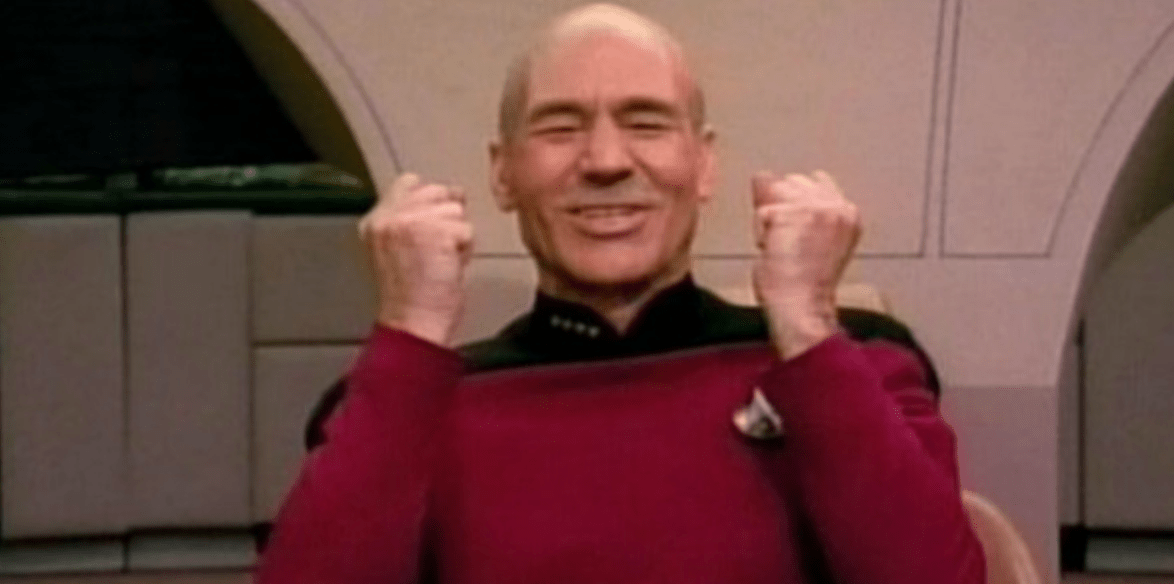

In [12]:
# Try it out as a one off ! 
enable_logging()

# take some samples
samples = 200
sample_proportion_1, sample_var_1 = generate_sample(p1, samples)
sample_proportion_2, sample_var_2 = generate_sample(p2, samples)

# Poool the variance and get the sample error
sample_error = generate_pooled_SE(sample_var_1, sample_var_2, samples, samples)

# grab a little p value and make determination
p_value = generate_p_value_two_sided(sample_proportion_1, sample_proportion_2, sample_error)
if(p_value < alpha): 
    url = skew_url
    logger.info("skew detected")
else:
    logger.info("No skew detected")
    url = no_skew_url

disp.Image(requests.get(url).content) 

In [13]:
disable_logging()
number_of_simulations = 100
p_values = np.zeros((number_of_simulations), dtype=np.float64)
decisions = np.zeros((number_of_simulations), dtype=np.int8)
sample_sizes = np.zeros((number_of_simulations), dtype=np.int32)

for i in range(0, number_of_simulations-1):
    logger.info("========")
    sample_sizes[i] = min_samples+(100*i)
    logger.info("number of trials: ", sample_sizes[i])
    sample_proportion_1, sample_var_1 = generate_sample(p1, sample_sizes[i])
    sample_proportion_2, sample_var_2 = generate_sample(p2, sample_sizes[i])
    sample_error = generate_pooled_SE(sample_var_1, sample_var_2, sample_sizes[i], sample_sizes[i])
    p_value = generate_p_value_two_sided(sample_proportion_1, sample_proportion_2, sample_error)
    p_values[i] = p_value
    if (p_value < alpha): 
        decisions[i] = 1
    else :
        decisions[i] = 0


proportion_of_skews_detectied = sum(decisions)/number_of_simulations
enable_logging()
logger.info("Skew percentage detected %f", proportion_of_skews_detectied)


INFO:root:Skew percentage detected 0.010000


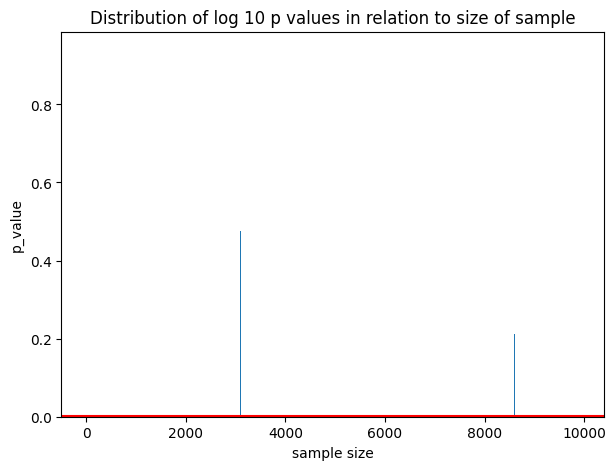

In [142]:

plt.figure(figsize=[7,5])
plt.bar(sample_sizes, p_values)
plt.xlabel('sample size')
plt.axhline(alpha,color='red')
plt.ylabel('p_value')
plt.title('Distribution of log 10 p values in relation to size of sample')
plt.show()

In [138]:
adjusted_p_values = np.where(p_values == 0, 0.000001, p_values)
adjusted_p_values

array([2.29575118e-02, 2.29719604e-01, 6.23165629e-01, 7.13979002e-03,
       3.75658825e-01, 1.52499525e-02, 8.70328675e-02, 5.72597872e-02,
       3.45629670e-01, 4.74259323e-01, 1.73621463e-06, 3.26061264e-03,
       9.77713473e-04, 2.31750625e-02, 2.73297586e-01, 3.57886345e-01,
       3.16882944e-03, 5.31084029e-02, 6.03488973e-01, 1.36105190e-02,
       1.22755326e-01, 5.87312660e-01, 2.49959567e-02, 4.65864091e-03,
       4.61943912e-01, 1.00998698e-09, 4.79085025e-01, 4.54176763e-01,
       2.08117107e-02, 5.01947781e-01, 4.76836478e-01, 4.36502071e-03,
       8.05539311e-01, 5.67937893e-03, 6.93185943e-06, 8.14909901e-04,
       6.31923837e-05, 4.08820085e-01, 3.71829561e-02, 7.35914438e-02,
       1.82048995e-06, 6.31159257e-01, 7.62699885e-01, 5.49901002e-02,
       9.16702478e-02, 8.02400415e-01, 2.08104916e-02, 7.43915336e-01,
       9.70372307e-03, 1.44214144e-04, 5.79247048e-01, 2.21436399e-03,
       6.78327058e-02, 1.39547124e-03, 9.39198678e-01, 3.19133695e-03,
      

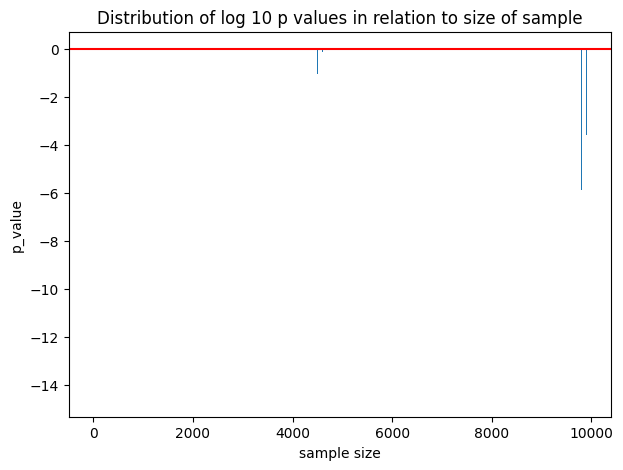

In [140]:
plt.figure(figsize=[7,5])
plt.bar(sample_sizes, np.log10(adjusted_p_values))
plt.xlabel('sample size')
plt.axhline(alpha,color='red')
plt.ylabel('p_value')
plt.title('Distribution of log 10 p values in relation to size of sample')
plt.show()